In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import ssl

# To resolve certificate error
ssl._create_default_https_context = ssl._create_unverified_context

device = torch.device('cuda:0' if torch.cuda.is_available()else 'cpu')
print(device)

train_transform = transforms.Compose([
     transforms.Resize(256), 
     #transforms.CenterCrop(224),
     #transforms.ColorJitter(brightness=0.5),
     #transforms.RandomRotation(degrees=45),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomCrop(224),
     transforms.AutoAugment(policy=transforms.AutoAugmentPolicy.CIFAR10),
     transforms.ToTensor(),
     transforms.Normalize((0.491,0.482,0.446), (0.247,0.243,0.261)
)])

test_transform = transforms.Compose([
     transforms.Resize(256), 
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize((0.491,0.482,0.446), (0.247,0.243,0.261)
)])

batch_size = 5
ap_num, am_num,bird_num,cat_num,deer_num = 0,0,0,0,0

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=train_transform)
ap_indices, am_indices, bird_indices, cat_indices, deer_indices = [],[],[],[],[]
ap_idx, am_idx, bird_idx, cat_idx, deer_idx = trainset.class_to_idx['airplane'], trainset.class_to_idx['automobile'], trainset.class_to_idx['bird'], trainset.class_to_idx['cat'], trainset.class_to_idx['deer']
for i in range(len(trainset)):
  current_class = trainset[i][1]
  if current_class == ap_idx:
    if ap_num<50:
      ap_indices.append(i)
      ap_num+=1
  elif current_class == am_idx:
    if am_num<50:
      am_indices.append(i)
      am_num+=1
  elif current_class == bird_idx:
    if bird_num<50:
      bird_indices.append(i)
      bird_num+=1
  elif current_class == cat_idx:
    if cat_num<50:
      cat_indices.append(i)
      cat_num+=1
  elif current_class == deer_idx:
    if deer_num<50:
      deer_indices.append(i)
      deer_num+=1

print('Number of airplane images:%d'%ap_num)
print('Number of automobile images:%d'%am_num)
print('Number of bird images:%d'%bird_num)
print('Number of cat images:%d'%cat_num)
print('Number of deer images:%d'%deer_num)

new_train = torch.utils.data.Subset(trainset,ap_indices+am_indices+bird_indices+cat_indices+deer_indices)

trainloader = torch.utils.data.DataLoader(new_train, batch_size = batch_size,
                                          shuffle=True, num_workers=2)

ap_num, am_num,bird_num,cat_num,deer_num = 0,0,0,0,0

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                       download=True, transform=test_transform)
ap_indices, am_indices, bird_indices, cat_indices, deer_indices = [],[],[],[],[]
ap_idx, am_idx, bird_idx, cat_idx, deer_idx = testset.class_to_idx['airplane'], testset.class_to_idx['automobile'], testset.class_to_idx['bird'], testset.class_to_idx['cat'], testset.class_to_idx['deer']
for i in range(len(testset)):
  current_class = testset[i][1]
  if current_class == ap_idx:
    if ap_num<30:
      ap_indices.append(i)
      ap_num+=1
  elif current_class == am_idx:
    if am_num<30:
      am_indices.append(i)
      am_num+=1
  elif current_class == bird_idx:
    if bird_num<30:
      bird_indices.append(i)
      bird_num+=1
  elif current_class == cat_idx:
    if cat_num<30:
      cat_indices.append(i)
      cat_num+=1
  elif current_class == deer_idx:
    if deer_num<30:
      deer_indices.append(i)
      deer_num+=1

print('Number of airplane images:%d'%ap_num)
print('Number of automobile images:%d'%am_num)
print('Number of bird images:%d'%bird_num)
print('Number of cat images:%d'%cat_num)
print('Number of deer images:%d'%deer_num)

new_test = torch.utils.data.Subset(testset,ap_indices+am_indices+bird_indices+cat_indices+deer_indices)

testloader = torch.utils.data.DataLoader(new_test, batch_size = batch_size,
                                         shuffle=False, num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer')
           

cuda:0
Files already downloaded and verified
Number of airplane images:50
Number of automobile images:50
Number of bird images:50
Number of cat images:50
Number of deer images:50
Files already downloaded and verified
Number of airplane images:30
Number of automobile images:30
Number of bird images:30
Number of cat images:30
Number of deer images:30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


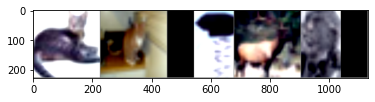

  cat   cat airplane  deer   cat


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' %classes[labels[j]] for j in range(batch_size)))

AlexNet

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchinfo import summary

alexnet = models.alexnet(pretrained=True).to(device)
for param in alexnet.parameters():
    param.requires_grad = False

alexnet.to(device).classifier[4] = nn.Linear(4096, 1024)
alexnet.to(device).classifier[6] = nn.Linear(1024, 5)
alexnet.to(device).eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.to(device).parameters(), lr=0.001, momentum=0.9)

In [5]:
running_corrects = 0
total = 0

for epoch in range(100):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)

        running_loss += loss.item()
        total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        if i%50 == 49:
            print('[%d, %5d]    Loss: %.3f   Accuracy: %.6f'%(epoch+1,i+1,running_loss/50,running_corrects/total))
            running_loss =0.0

print('Finished Training')

correct = 0
total = 0

with torch.no_grad():
   for data in testloader:
       images, labels = data
       images = images.to(device)
       labels = labels.to(device)
       outputs_alexnet = alexnet(images)
       _, predicted = torch.max(outputs_alexnet.data, 1)
       total += labels.size(0)
       correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' %(100*correct/total)) 

[1,    50]    Loss: 1.471   Accuracy: 0.400000
[2,    50]    Loss: 0.997   Accuracy: 0.512000
[3,    50]    Loss: 0.871   Accuracy: 0.569333
[4,    50]    Loss: 0.841   Accuracy: 0.591000
[5,    50]    Loss: 0.760   Accuracy: 0.611200
[6,    50]    Loss: 0.668   Accuracy: 0.632000
[7,    50]    Loss: 0.583   Accuracy: 0.650857
[8,    50]    Loss: 0.660   Accuracy: 0.659500
[9,    50]    Loss: 0.631   Accuracy: 0.674222
[10,    50]    Loss: 0.604   Accuracy: 0.685200
[11,    50]    Loss: 0.539   Accuracy: 0.693091
[12,    50]    Loss: 0.525   Accuracy: 0.701333
[13,    50]    Loss: 0.490   Accuracy: 0.709846
[14,    50]    Loss: 0.465   Accuracy: 0.717714
[15,    50]    Loss: 0.516   Accuracy: 0.722667
[16,    50]    Loss: 0.460   Accuracy: 0.729750
[17,    50]    Loss: 0.391   Accuracy: 0.737647
[18,    50]    Loss: 0.416   Accuracy: 0.742222
[19,    50]    Loss: 0.357   Accuracy: 0.749053
[20,    50]    Loss: 0.369   Accuracy: 0.755600
[21,    50]    Loss: 0.410   Accuracy: 0.760762
[

VGG16

In [6]:
vgg16 = models.vgg16(pretrained=True).to(device)
for param in vgg16.parameters():
    param.requires_grad = False

vgg16.to(device).classifier[6] = nn.Linear(4096, 5)
vgg16.to(device).eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.to(device).parameters(), lr=0.001, momentum=0.9)

In [8]:
running_corrects = 0
total = 0

for epoch in range(100):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)

        running_loss += loss.item()
        total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        if i%50 == 49:
            print('[%d, %5d]    Loss: %.3f   Accuracy: %.6f'%(epoch+1,i+1,running_loss/50,running_corrects/total))
            running_loss =0.0

print('Finished Training')

correct = 0
total = 0

with torch.no_grad():
   for data in testloader:
       images, labels = data
       images = images.to(device)
       labels = labels.to(device)
       outputs_vgg16 = vgg16(images)
       #print(outputs.shape)
       #print(F.softmax(outputs, dim=1)*100.0)
       #print(torch.max(outputs.data))
       #print(labels)
       _, predicted = torch.max(outputs_vgg16.data, 1)
       #print(predicted)
       total += labels.size(0)
       #print(total)
       correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' %(100*correct/total)) 

[1,    50]    Loss: 1.271   Accuracy: 0.484000
[2,    50]    Loss: 0.783   Accuracy: 0.588000
[3,    50]    Loss: 0.730   Accuracy: 0.630667
[4,    50]    Loss: 0.676   Accuracy: 0.656000
[5,    50]    Loss: 0.566   Accuracy: 0.678400
[6,    50]    Loss: 0.623   Accuracy: 0.696667
[7,    50]    Loss: 0.482   Accuracy: 0.716000
[8,    50]    Loss: 0.477   Accuracy: 0.732500
[9,    50]    Loss: 0.511   Accuracy: 0.742222
[10,    50]    Loss: 0.488   Accuracy: 0.749600
[11,    50]    Loss: 0.622   Accuracy: 0.752364
[12,    50]    Loss: 0.513   Accuracy: 0.759333
[13,    50]    Loss: 0.489   Accuracy: 0.765231
[14,    50]    Loss: 0.429   Accuracy: 0.771143
[15,    50]    Loss: 0.464   Accuracy: 0.776533
[16,    50]    Loss: 0.384   Accuracy: 0.781500
[17,    50]    Loss: 0.446   Accuracy: 0.786353
[18,    50]    Loss: 0.392   Accuracy: 0.790444
[19,    50]    Loss: 0.410   Accuracy: 0.794316
[20,    50]    Loss: 0.391   Accuracy: 0.797000
[21,    50]    Loss: 0.468   Accuracy: 0.798476
[

ResNet101

In [9]:

resnet101 = models.resnet101(pretrained=True).to(device)
for param in resnet101.parameters():
    param.requires_grad = False

resnet101.to(device).fc = nn.Linear(2048, 5)
resnet101.to(device).eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet101.to(device).parameters(), lr=0.001, momentum=0.9)

In [11]:
running_corrects = 0
total = 0

for epoch in range(100):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = resnet101(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)

        running_loss += loss.item()
        total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        if i%50 == 49:
            print('[%d, %5d]    Loss: %.3f   Accuracy: %.6f'%(epoch+1,i+1,running_loss/50,running_corrects/total))
            running_loss =0.0

print('Finished Training')

correct = 0
total = 0

with torch.no_grad():
   for data in testloader:
       images, labels = data
       images = images.to(device)
       labels = labels.to(device)
       outputs_resnet = resnet101(images)
       #print(outputs.shape)
       #print(F.softmax(outputs, dim=1)*100.0)
       #print(torch.max(outputs.data))
       #print(labels)
       _, predicted = torch.max(outputs_resnet.data, 1)
       #print(predicted)
       total += labels.size(0)
       #print(total)
       correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' %(100*correct/total)) 


[1,    50]    Loss: 1.131   Accuracy: 0.552000
[2,    50]    Loss: 0.619   Accuracy: 0.684000
[3,    50]    Loss: 0.607   Accuracy: 0.713333
[4,    50]    Loss: 0.403   Accuracy: 0.753000
[5,    50]    Loss: 0.430   Accuracy: 0.774400
[6,    50]    Loss: 0.455   Accuracy: 0.784667
[7,    50]    Loss: 0.448   Accuracy: 0.788571
[8,    50]    Loss: 0.413   Accuracy: 0.797500
[9,    50]    Loss: 0.356   Accuracy: 0.805778
[10,    50]    Loss: 0.431   Accuracy: 0.809200
[11,    50]    Loss: 0.350   Accuracy: 0.814545
[12,    50]    Loss: 0.328   Accuracy: 0.820667
[13,    50]    Loss: 0.378   Accuracy: 0.823077
[14,    50]    Loss: 0.425   Accuracy: 0.824000
[15,    50]    Loss: 0.364   Accuracy: 0.826933
[16,    50]    Loss: 0.333   Accuracy: 0.829250
[17,    50]    Loss: 0.414   Accuracy: 0.830824
[18,    50]    Loss: 0.298   Accuracy: 0.833556
[19,    50]    Loss: 0.336   Accuracy: 0.835579
[20,    50]    Loss: 0.370   Accuracy: 0.837000
[21,    50]    Loss: 0.332   Accuracy: 0.839810
[

GoogLeNet

In [12]:
googlenet = models.googlenet(pretrained=True).to(device)
for param in googlenet.parameters():
    param.requires_grad = False

googlenet.to(device).fc = nn.Linear(1024, 5)
googlenet.to(device).eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(googlenet.to(device).parameters(), lr=0.001, momentum=0.9)

In [14]:
running_corrects = 0
total = 0

for epoch in range(100):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = googlenet(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)

        running_loss += loss.item()
        total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        if i%50 == 49:
            print('[%d, %5d]    Loss: %.3f   Accuracy: %.6f'%(epoch+1,i+1,running_loss/50,running_corrects/total))
            running_loss =0.0

print('Finished Training')

correct = 0
total = 0

with torch.no_grad():
   for data in testloader:
       images, labels = data
       images = images.to(device)
       labels = labels.to(device)
       outputs_googlenet = googlenet(images)
       #print(outputs.shape)
       #print(F.softmax(outputs, dim=1)*100.0)
       #print(torch.max(outputs.data))
       #print(labels)
       _, predicted = torch.max(outputs_googlenet.data, 1)
       #print(predicted)
       total += labels.size(0)
       #print(total)
       correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' %(100*correct/total)) 


[1,    50]    Loss: 1.520   Accuracy: 0.320000
[2,    50]    Loss: 1.116   Accuracy: 0.460000
[3,    50]    Loss: 0.981   Accuracy: 0.528000
[4,    50]    Loss: 0.799   Accuracy: 0.587000
[5,    50]    Loss: 0.759   Accuracy: 0.619200
[6,    50]    Loss: 0.742   Accuracy: 0.638667
[7,    50]    Loss: 0.746   Accuracy: 0.650857
[8,    50]    Loss: 0.664   Accuracy: 0.668000
[9,    50]    Loss: 0.674   Accuracy: 0.680000
[10,    50]    Loss: 0.636   Accuracy: 0.692400
[11,    50]    Loss: 0.608   Accuracy: 0.701818
[12,    50]    Loss: 0.532   Accuracy: 0.712667
[13,    50]    Loss: 0.580   Accuracy: 0.719692
[14,    50]    Loss: 0.610   Accuracy: 0.724857
[15,    50]    Loss: 0.577   Accuracy: 0.728000
[16,    50]    Loss: 0.561   Accuracy: 0.733000
[17,    50]    Loss: 0.566   Accuracy: 0.736941
[18,    50]    Loss: 0.484   Accuracy: 0.742667
[19,    50]    Loss: 0.520   Accuracy: 0.746737
[20,    50]    Loss: 0.518   Accuracy: 0.750000
[21,    50]    Loss: 0.546   Accuracy: 0.752000
[

4-in-1 Model

In [15]:
correct = 0
total = 0

with torch.no_grad():
   for data in testloader:
       images, labels = data
       images = images.to(device)
       labels = labels.to(device)
       outputs_alexnet = alexnet(images)
       outputs_vgg16 = vgg16(images)
       outputs_resnet = resnet101(images)
       outputs_googlenet = googlenet(images)
       outputs_4in1 = (outputs_alexnet+outputs_vgg16+outputs_resnet+outputs_googlenet)/4
       #print(outputs.shape)
       #print(F.softmax(outputs, dim=1)*100.0)
       #print(torch.max(outputs.data))
       #print(labels)
       _, predicted = torch.max(outputs_4in1.data, 1)
       #print(predicted)
       total += labels.size(0)
       #print(total)
       correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' %(100*correct/total))

Accuracy: 88 %


In [20]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs_alexnet = alexnet(images)
        outputs_vgg16 = vgg16(images)
        outputs_resnet = resnet101(images)
        outputs_googlenet = googlenet(images)
        outputs_4in1 = (outputs_alexnet+outputs_vgg16+outputs_resnet+outputs_googlenet)/4
        _, predictions = torch.max(outputs_4in1,1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100*float(correct_count)/total_pred[classname]
    print('Accuracy for class {:5s} is : {:.1f} %'.format(classname,accuracy))

Accuracy for class airplane is : 93.3 %
Accuracy for class automobile is : 93.3 %
Accuracy for class bird  is : 80.0 %
Accuracy for class cat   is : 90.0 %
Accuracy for class deer  is : 86.7 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


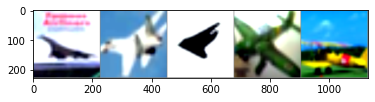

GroundTruth: airplane airplane airplane airplane airplane 


In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth:',''.join('%5s ' % classes[labels[j]] for j in range(batch_size)))

In [18]:
images = images.to(device)
labels = labels.to(device)
outputs_alexnet = alexnet(images)
outputs_vgg16 = vgg16(images)
outputs_resnet = resnet101(images)
outputs_googlenet = googlenet(images)
outputs_4in1 = (outputs_alexnet+outputs_vgg16+outputs_resnet+outputs_googlenet)/4

In [19]:
_, predicted = torch.max(outputs_4in1,1)

print('Predicted: ', ''.join('%5s' % classes[predicted[j]] for j in range(batch_size)))

Predicted:  airplaneairplaneairplaneairplaneairplane
